In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [39]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, classification_report, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SVMSMOTE
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from sklearn.ensemble import AdaBoostClassifier

In [41]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Harshitha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Harshitha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Harshitha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sample=pd.read_csv("sample_submission.csv")

In [43]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [44]:
target_columns = list(sample.columns.drop('id'))
target_columns

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [45]:
train[target_columns].sum()


toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [46]:
pip install imbalanced-learn scikit-learn

Note: you may need to restart the kernel to use updated packages.


This code snippet seems to be manipulating a DataFrame named train, likely in the context of a machine learning project involving toxicity classification. Here's a breakdown of what each part of the code is doing:

Calculating 'non-toxic' label:

train['non-toxic'] = 1 - train[target_columns].max(axis=1): This line calculates the 'non-toxic' label for each row in the DataFrame. It takes the maximum value across the columns specified in target_columns (e.g., 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'), subtracts it from 1, and assigns the result to the 'non-toxic' column. This means if any of the specified toxicity types have a positive value (indicating toxicity), the 'non-toxic' label will be 0, otherwise, it will be 1.
Determining 'toxicity_type_defined':

train['toxicity_type_defined'] = train[['insult','obscene','identity_hate','threat']].max(axis=1): This line calculates the 'toxicity_type_defined' label for each row in the DataFrame. It takes the maximum value across the specified toxicity types ('insult', 'obscene', 'identity_hate', 'threat') and assigns the result to the 'toxicity_type_defined' column. This label indicates whether any type of toxicity is present in the comment.
Defining 'toxic_undefined':

train['toxic_undefined'] = 0: This line initializes a new column 'toxic_undefined' with all values set to 0.
train.loc[(train['toxicity_type_defined']==0)&(train['toxic']==1),'toxic_undefined'] = 1: This line sets the value of 'toxic_undefined' to 1 for rows where 'toxicity_type_defined' is 0 (indicating no specific type of toxicity is defined) and 'toxic' is 1 (indicating toxicity is present). This suggests that the toxicity type is undefined even though the comment is toxic.
Defining 'soft_toxic':

train['soft_toxic'] = 0: This line initializes a new column 'soft_toxic' with all values set to 0.
train.loc[(train['toxicity_type_defined']==1)&(train['toxic']==0),'soft_toxic'] = 1: This line sets the value of 'soft_toxic' to 1 for rows where 'toxicity_type_defined' is 1 (indicating a specific type of toxicity is defined) and 'toxic' is 0 (indicating no toxicity is present). This suggests that although a specific type of toxicity is defined, the comment is not toxic.
Defining 'analysis_columns':

analysis_columns = target_columns + ['non-toxic', 'toxic_undefined', 'soft_toxic']: This line creates a list of column names to be used for analysis. It includes the original target columns ('target_columns'), as well as the newly created labels ('non-toxic', 'toxic_undefined', 'soft_toxic'). These columns are likely used as features or labels for toxicity classification analysis.

In [47]:
train['non-toxic'] = 1-train[target_columns].max(axis=1)

train['toxicity_type_defined'] = train[['insult','obscene','identity_hate','threat']].max(axis=1)

train['toxic_undefined'] = 0
train.loc[(train['toxicity_type_defined']==0)&(train['toxic']==1),'toxic_undefined'] = 1

train['soft_toxic'] = 0
train.loc[(train['toxicity_type_defined']==1)&(train['toxic']==0),'soft_toxic'] = 1

analysis_columns = target_columns + ['non-toxic', 'toxic_undefined', 'soft_toxic']

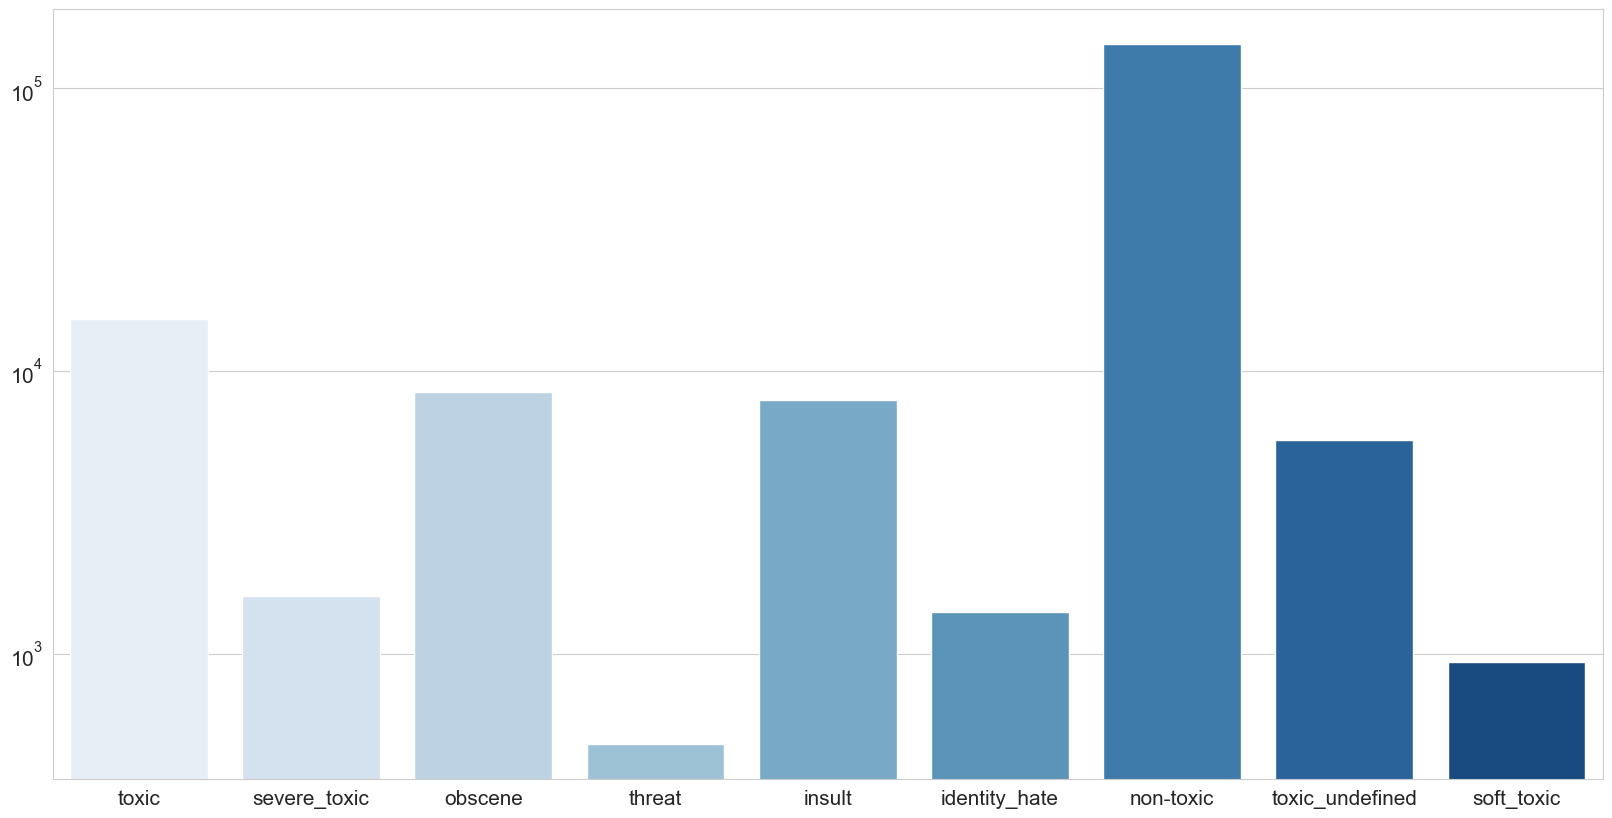

In [48]:
label_counts = train[analysis_columns].sum()
plt.figure(figsize=(20, 10))
# Change the color of the bars to blue using a predefined palette
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette='Blues')
ax.set_yscale("log")
ax.tick_params(labelsize=15)
plt.show()

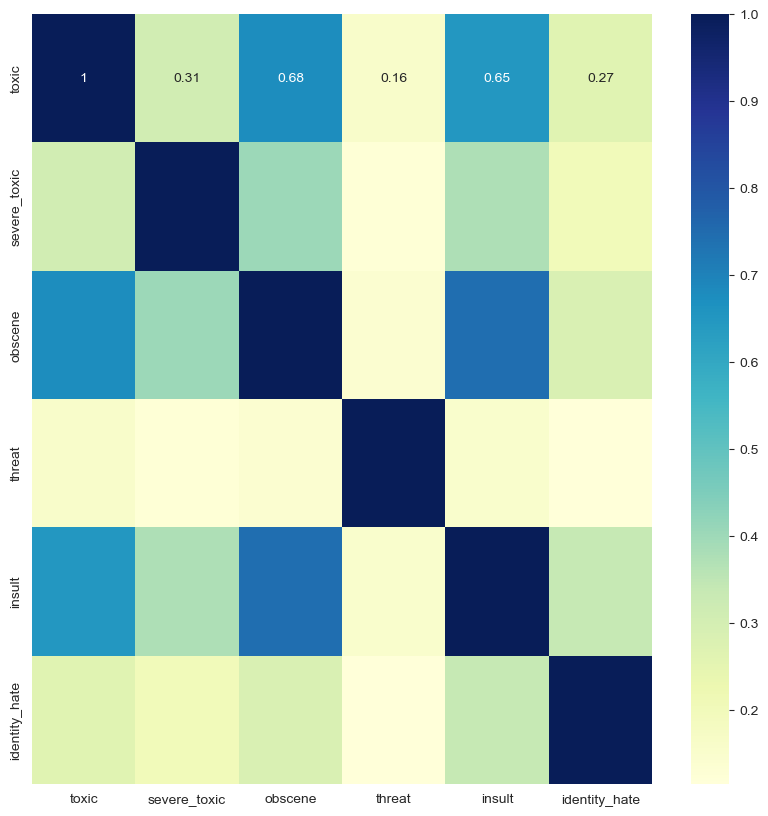

In [49]:
# Visualize any correlations between labels
heatmap_data = train[target_columns]
plt.figure(figsize=(10, 10))
# Change the color map to 'YlGnBu'
ax = sns.heatmap(heatmap_data.corr(), cmap='YlGnBu', annot=True)
ax.tick_params(labelsize=10)
plt.show()

In [50]:
train.loc[train['severe_toxic']==1,'toxic'].sum()

1595

In [51]:
print(type(train))
print(train.columns) 

<class 'pandas.core.frame.DataFrame'>
Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'non-toxic', 'toxicity_type_defined',
       'toxic_undefined', 'soft_toxic'],
      dtype='object')


In [52]:
# Define train_balanced
train_balanced = pd.concat([train[train['non-toxic'] == 1].sample(frac=0.11), train.loc[train['non-toxic'] == 0]])

# Shuffle the DataFrame
train_balanced = train_balanced.sample(frac=1)

# Define target_columns
target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'soft_toxic']


In [53]:
train_balanced

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non-toxic,toxicity_type_defined,toxic_undefined,soft_toxic
30091,4fe25076ac613a85,""":Richard, Wikipedia policy requires us to rec...",0,0,0,0,0,0,1,0,0,0
66843,b2db4d7a8f50eaf5,Stop being idiotic\n\nStop screwing around wit...,1,0,0,0,1,0,0,1,0,0
148137,478506711846caf9,Nanny 911 the game\nWhat about the recently re...,0,0,0,0,0,0,1,0,0,0
55680,94c2845543e3f6be,Reply \n\nYou take Wikipedia way too seriously...,1,0,0,0,1,0,0,1,0,0
131794,c13dd1db91ddbd23,Gay people are so self centered \n\nSeriously....,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
151144,77fc0305d7401f70,Actually this guy is right you blocked me in l...,1,0,0,0,0,0,0,0,1,0
155707,c2569ca2b59b3cba,Stay in the closet.,1,0,0,0,0,0,0,0,1,0
59436,9f33f11221ae7385,\\n The above poster sucks a lot of cock.,1,0,0,0,0,0,0,0,1,0
69112,b8e6ca0a75ea39dc,"""\n\n Vandalism \n\nHow's about I stick """"Wank...",1,0,0,0,0,0,0,0,1,0


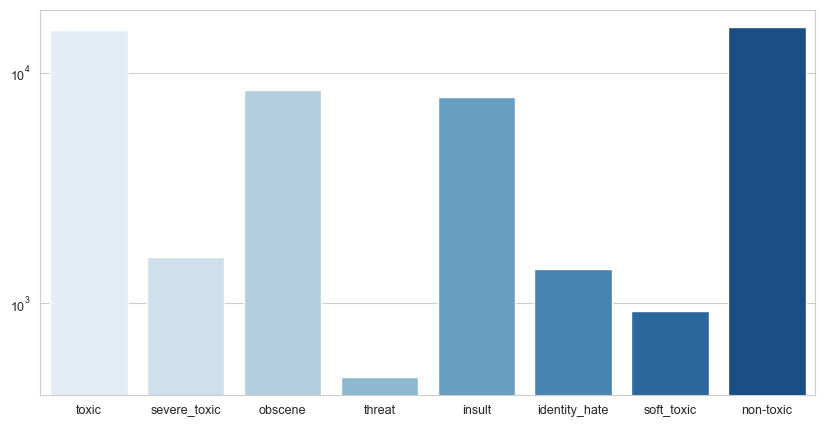

In [54]:
# Define train_balanced
train_balanced = pd.concat([train[train['non-toxic'] == 1].sample(frac=0.11), train.loc[train['non-toxic'] == 0]])

# Shuffle the DataFrame
train_balanced = train_balanced.sample(frac=1)

# Define target_columns
target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'soft_toxic']

# Now you can proceed with using train_balanced and target_columns
label_counts = train_balanced[target_columns + ['non-toxic']].sum()
plt.figure(figsize=(10, 5))

# Set seaborn style to whitegrid
sns.set_style("whitegrid")

# Define blue color palette
blue_palette = sns.color_palette("Blues", len(label_counts))

# Create bar plot with blue theme
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette=blue_palette)
ax.set_yscale("log")
ax.tick_params(labelsize=9)

# Show plot
plt.show()


In [55]:
import string
all_tokens = []
lemmas = []
nonstop_tokens = []
total_number_of_tokens = []
number_of_sentences = []
number_of_puncts = []

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

for text in train_balanced['comment_text']:
    # Tokenization
    tokens = word_tokenize(text.lower())
    all_tokens.append(tokens)
    
    # Lemmatization and stopword removal
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    lemmas.append(lemmatized_tokens)
    
    # Non-stopword tokens
    nonstop_tokens.append([word for word in lemmatized_tokens if word not in stop_words])
    
    # Total number of tokens
    total_number_of_tokens.append(len(tokens))
    
    # Number of sentences
    number_of_sentences.append(len(nltk.sent_tokenize(text)))
    
    # Number of punctuations
    number_of_puncts.append(len([char for char in text if char in string.punctuation]))

train_balanced['all_tokens'] = all_tokens
train_balanced['nonstop_tokens'] = nonstop_tokens
train_balanced['lemmas'] = lemmas
train_balanced['total_number_of_tokens'] = total_number_of_tokens
train_balanced['number_of_sentences'] = number_of_sentences
train_balanced['number_of_puncts'] = number_of_puncts


This code snippet appears to perform a normalization process on the 'total_number_of_tokens' column of the train_balanced DataFrame using a logarithmic transformation.

Here's a breakdown of what each part of the code does:

Calculate the maximum of log-transformed values:

log_max = np.log(train_balanced['total_number_of_tokens'].max()): This calculates the natural logarithm of the maximum value in the 'total_number_of_tokens' column. It's common to use the maximum value to scale or normalize data.
Apply the logarithmic transformation:

train_balanced['log_tokens'] = train_balanced['total_number_of_tokens']**(1/log_max): This line raises each value in the 'total_number_of_tokens' column to the power of 1/log_max. This operation effectively applies a logarithmic transformation to the data, which can help in dealing with skewed distributions and outliers.
Normalize the transformed values:

upper = train_balanced['log_tokens'].max(): This calculates the maximum value of the transformed data.
train_balanced['log_tokens_normalised'] = (train_balanced['log_tokens'])/(upper): This line normalizes the transformed values by dividing each value by the maximum value obtained in the previous step. This ensures that the transformed values are scaled between 0 and 1.
Usage of the transformed data:

The transformed and normalized values are stored in the new column 'log_tokens_normalised'. This column can be used for further analysis or modeling.
Overall, this process helps in transforming and normalizing the 'total_number_of_tokens' column, which might be useful for certain types of analysis or modeling tasks.

In [56]:
log_max = np.log(train_balanced['total_number_of_tokens'].max())
train_balanced['log_tokens'] = train_balanced['total_number_of_tokens']**(1/log_max)
upper = train_balanced['log_tokens'].max()
train_balanced['log_tokens_normalised'] = (train_balanced['log_tokens'])/(upper)
#helpful_log_max_root = df.Helpful_Votes**(1/log_maxlog_max

Word list for label toxic: ['bull', 'fucking', 'shit', 'racist', 'scumbag', 'gay', 'pedophile', 'dolescum', 'stupid', 'motherfucker']


C:\Users\Harshitha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


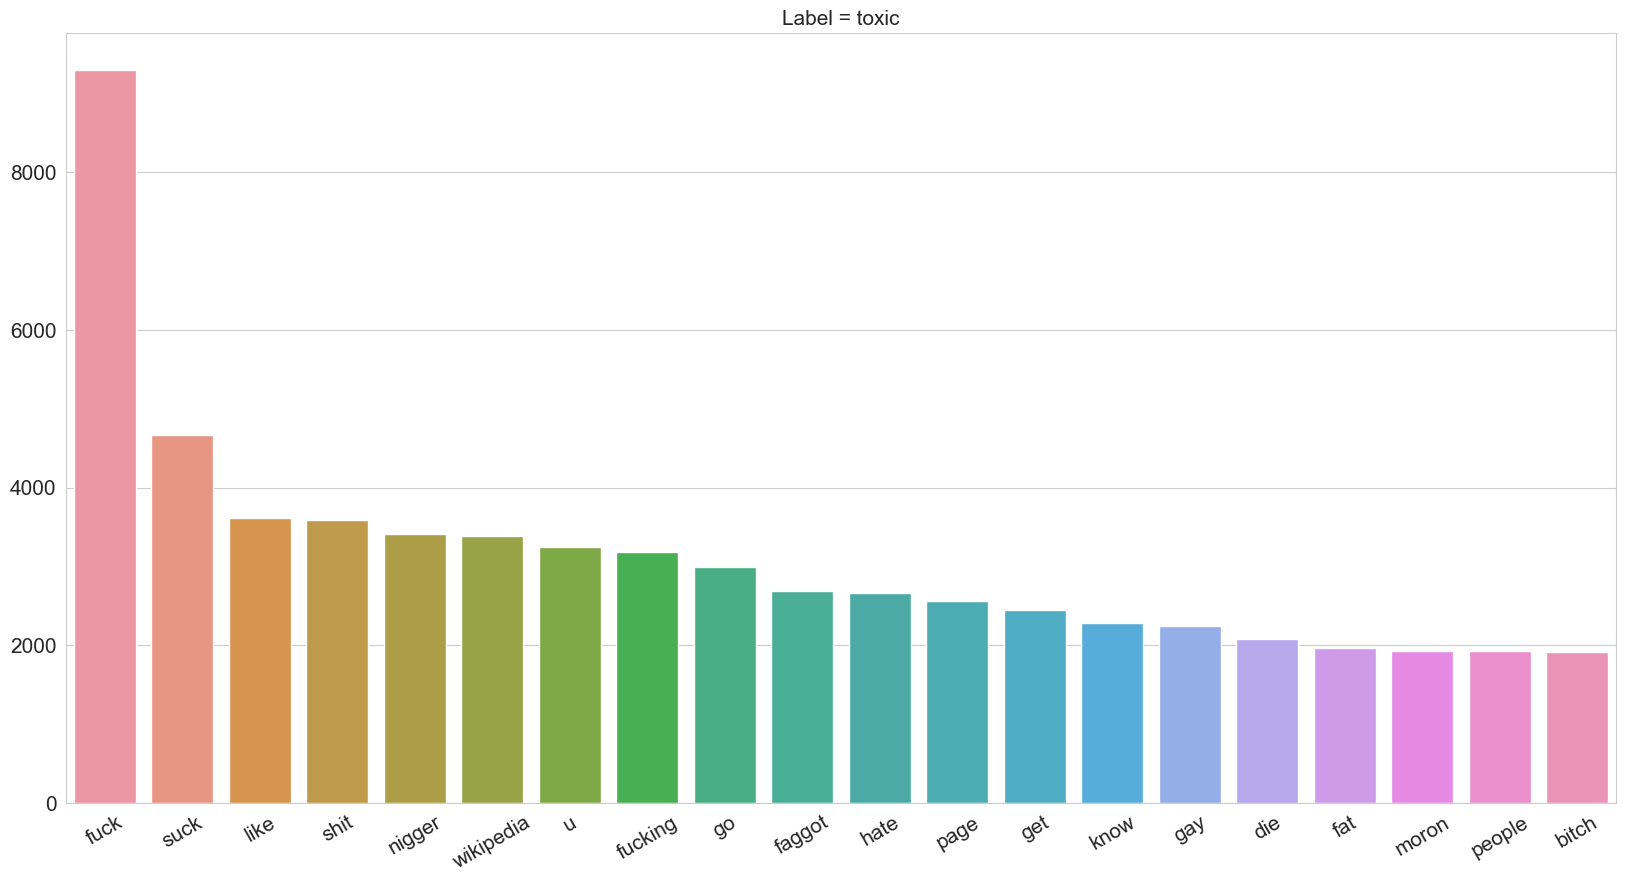

Word list for label severe_toxic: ['bull', 'fucking', 'shit', 'racist', 'scumbag', 'unblock', 'well', 'least', 'gay', 'fag']


C:\Users\Harshitha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


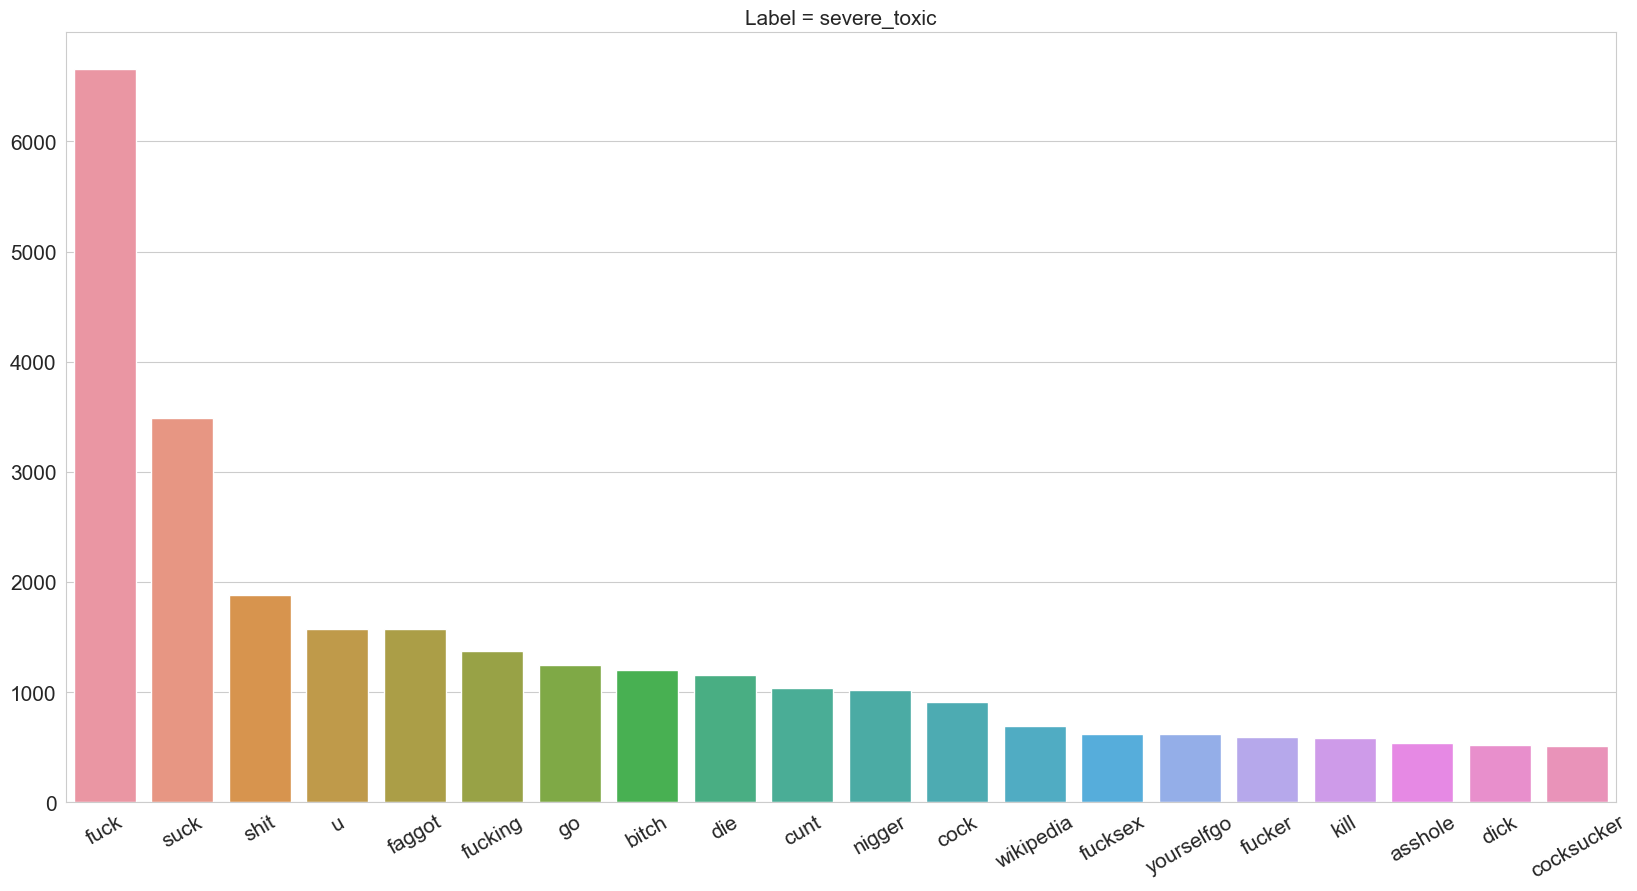

Word list for label obscene: ['bull', 'fucking', 'shit', 'racist', 'scumbag', 'dolescum', 'stupid', 'motherfucker', 'unblock', 'well']


C:\Users\Harshitha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


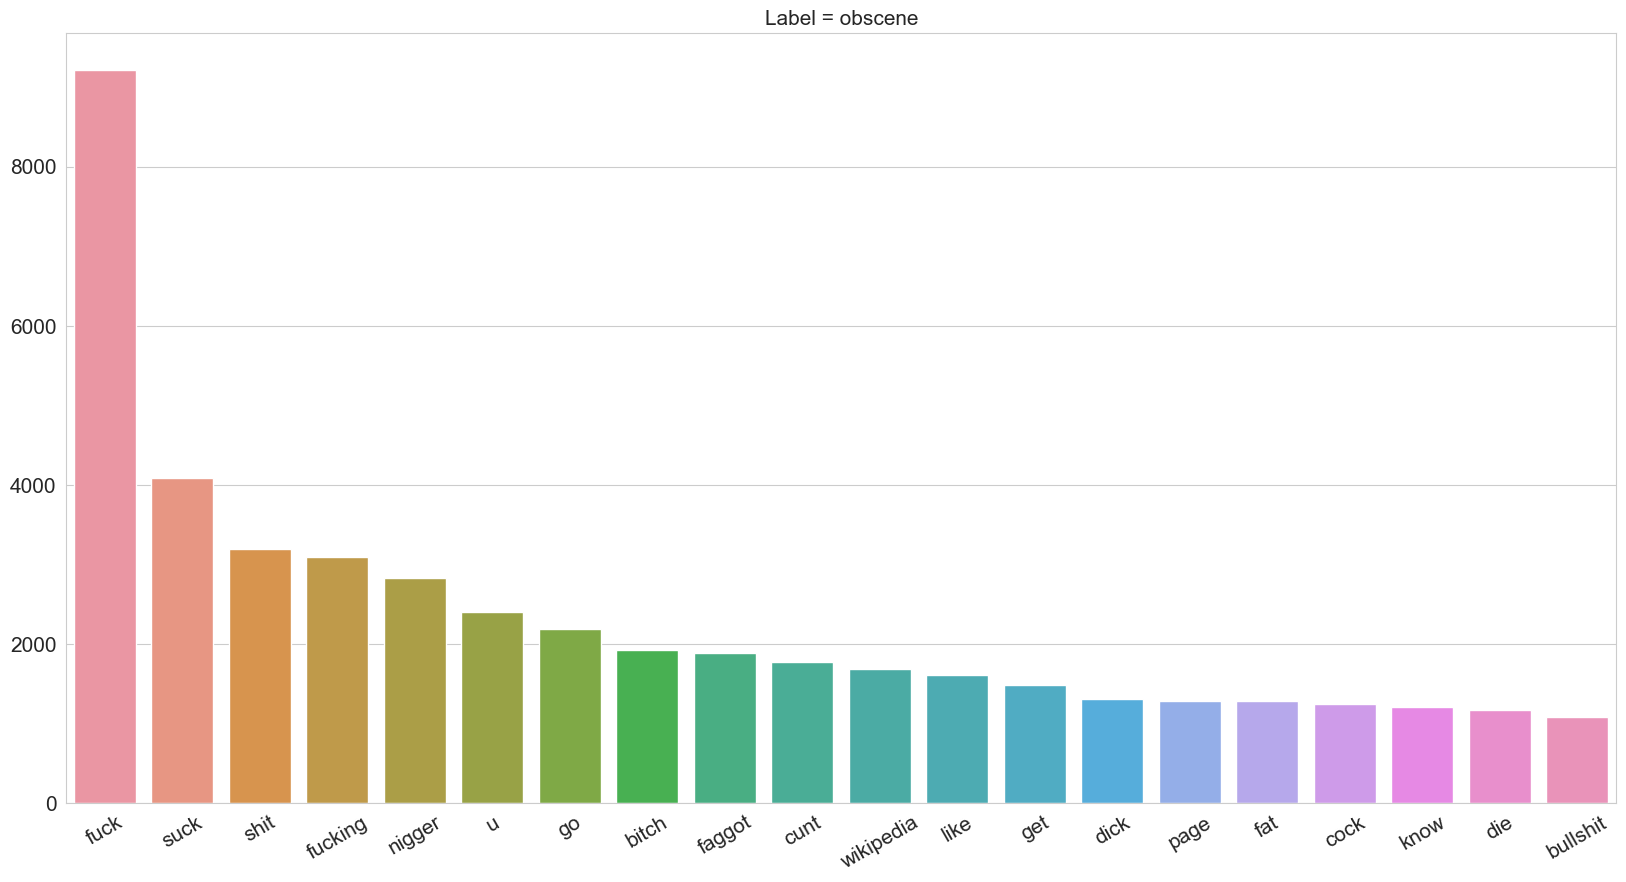

Word list for label threat: ['guy', 'fuckin', 'prick', 'ever', 'come', 'cross', 'u', 'public', 'swear', 'god']


C:\Users\Harshitha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


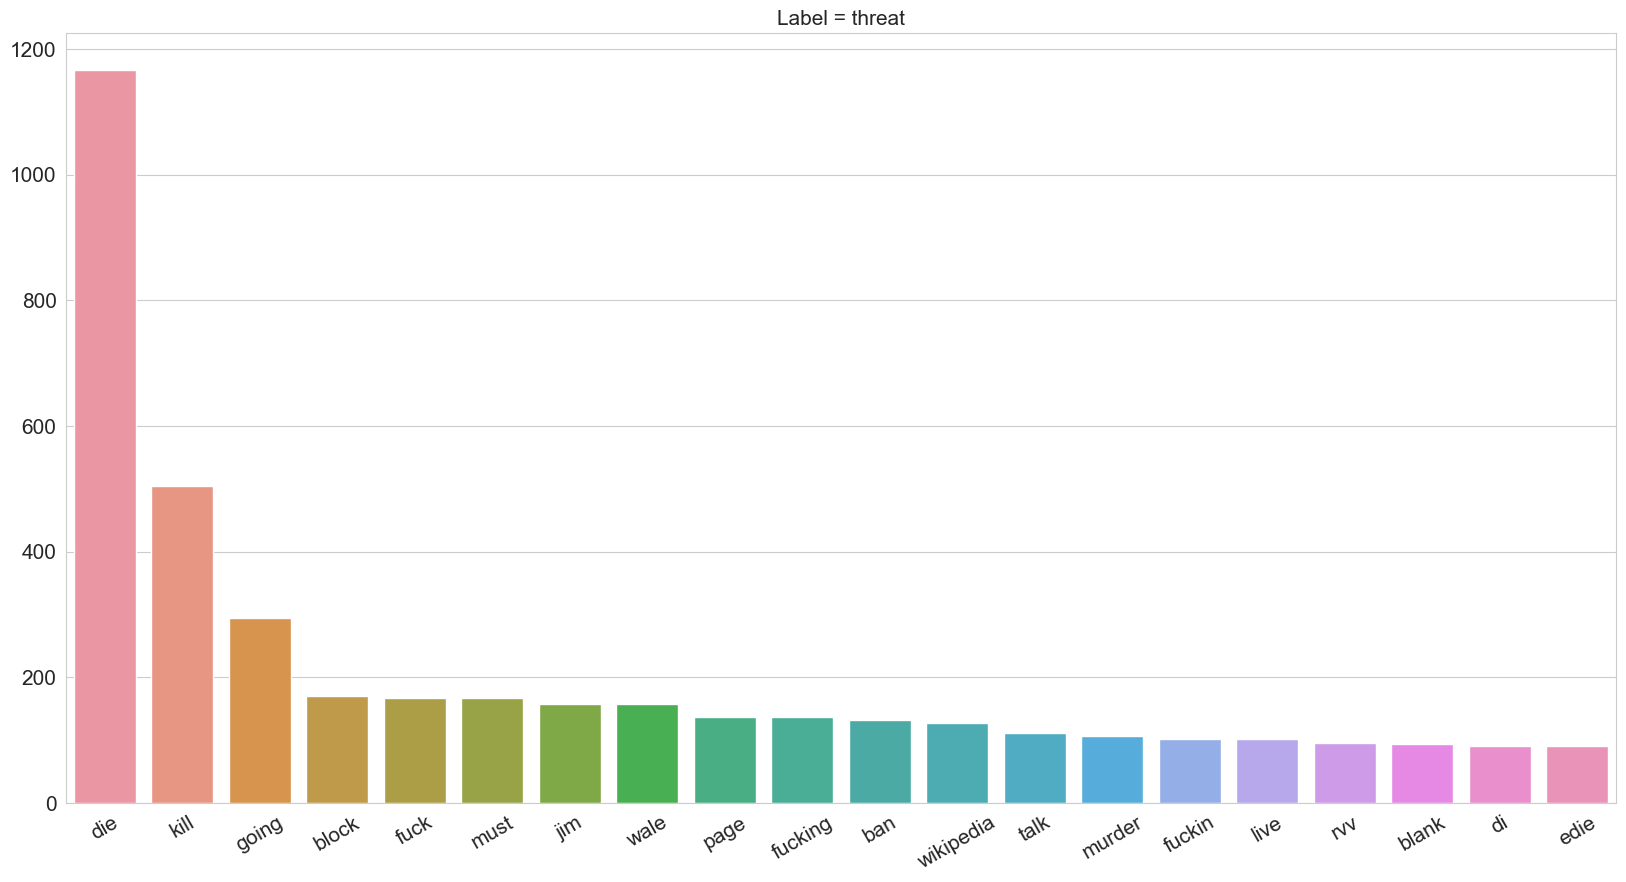

Word list for label insult: ['bull', 'fucking', 'shit', 'racist', 'scumbag', 'dolescum', 'stupid', 'motherfucker', 'unblock', 'well']


C:\Users\Harshitha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


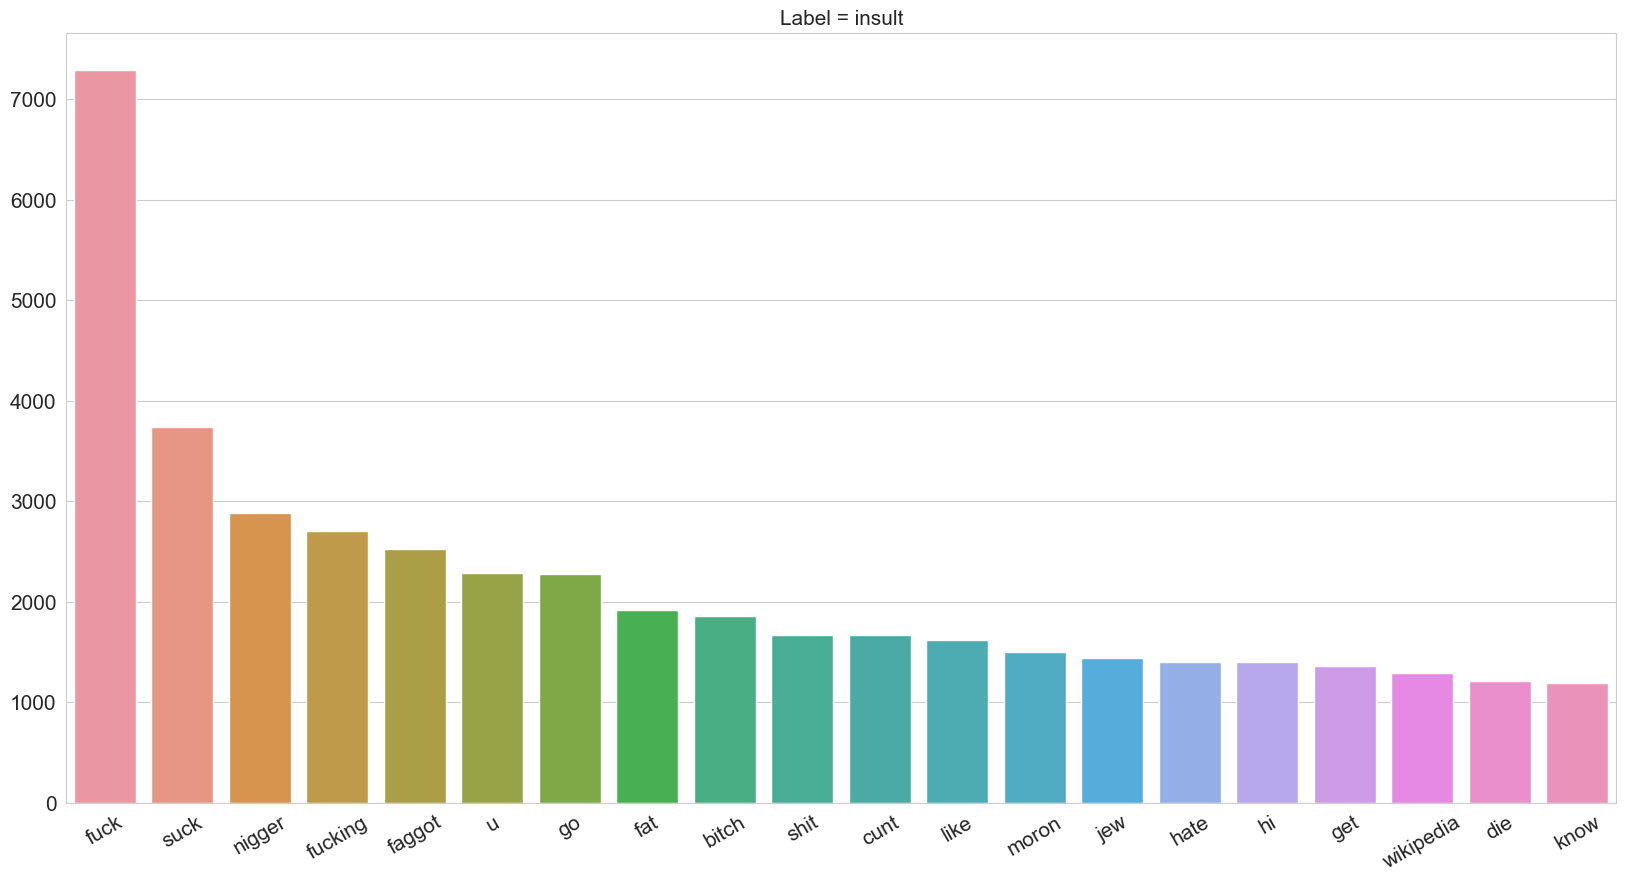

Word list for label identity_hate: ['gay', 'pedophile', 'unblock', 'well', 'least', 'gay', 'fag', 'like', 'mom', 'wrote']


C:\Users\Harshitha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


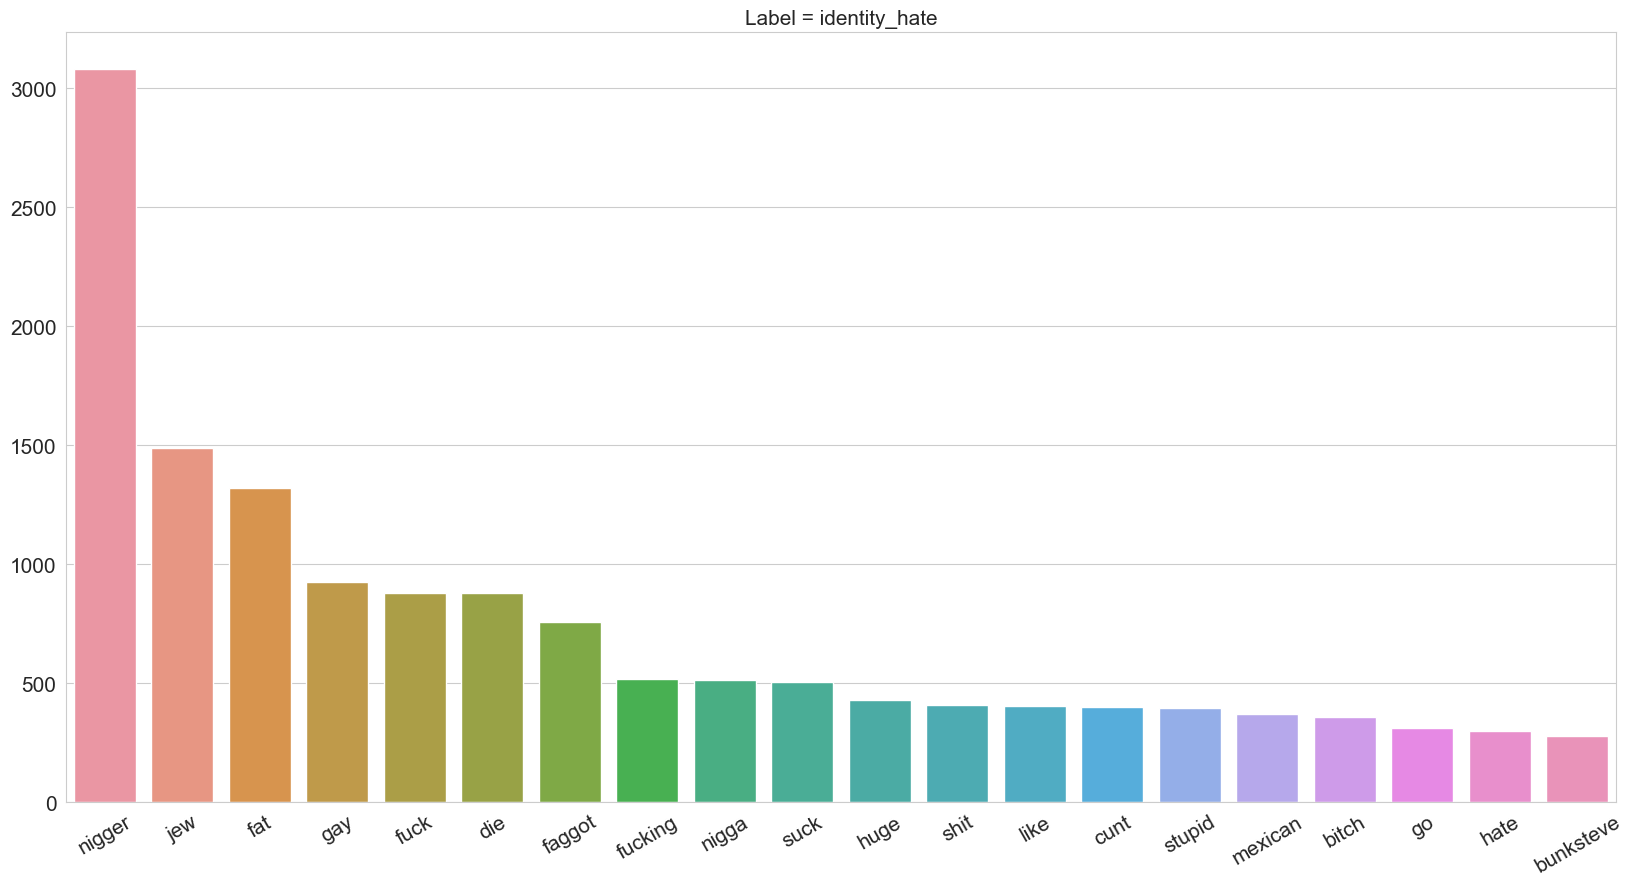

Word list for label soft_toxic: ['ahem', 'wtf', 'u', 'talking', 'sire', 'practice', 'vandalism', 'regression', 'retard', 'refuse']


C:\Users\Harshitha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


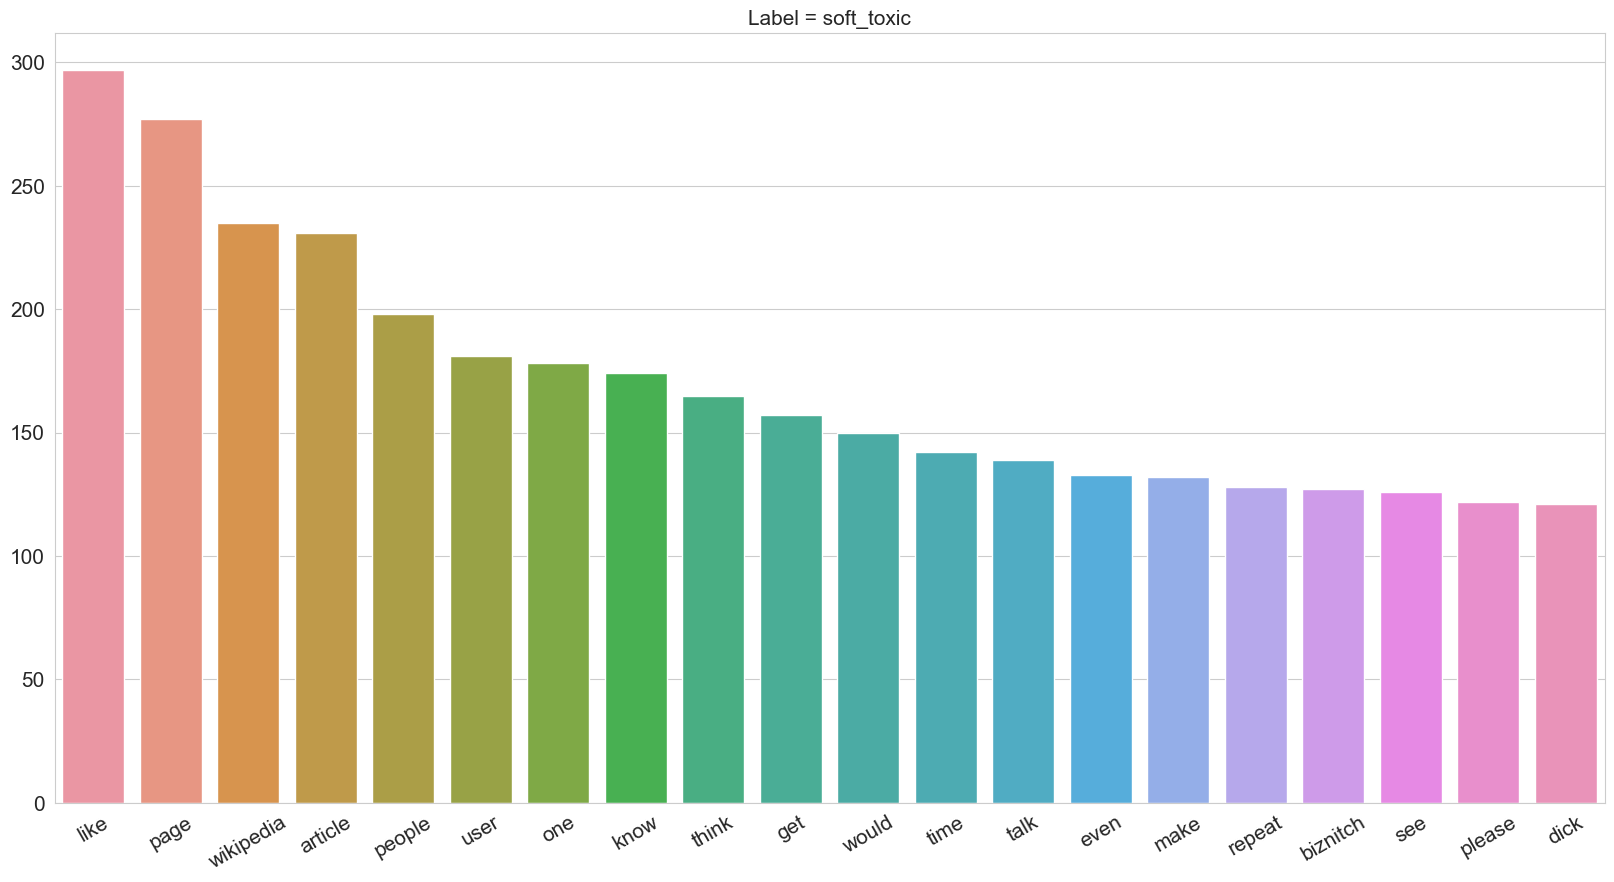

In [57]:
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming train_balanced is a DataFrame and target_columns is a list of column names

for label in target_columns:
    # Extract the series of lists
    token_series = train_balanced.loc[train_balanced[label] == 1, 'nonstop_tokens']
    
    # Ensure all elements are lists
    token_series = token_series.apply(lambda x: x if isinstance(x, list) else [])
    
    # Explode the series of lists into a single list
    word_list = token_series.explode().tolist()
    
    # Check the content of word_list
    print(f'Word list for label {label}:', word_list[:10])  # Print first 10 words for inspection
    
    # Ensure word_list is not empty
    if word_list:
        # Get the 20 most common words
        most_common = collections.Counter(word_list).most_common(20)
        words = [w for w, _ in most_common]
        counts = [c for _, c in most_common]
        
        # Plotting
        plt.figure(figsize=(20, 10))
        ax = sns.barplot(x=words, y=counts)
        ax.set_title(f'Label = {label}', fontsize=15)
        ax.tick_params(labelsize=15)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
        plt.show()
    else:
        print(f'No words found for label {label}')


This code is splitting the train_balanced DataFrame into a training set and a validation set.

Here's a breakdown of what each line does:

val_border = int(len(train_balanced) * 0.6): This calculates the index at which to split the DataFrame. It takes 60% of the length of the train_balanced DataFrame and converts it to an integer.

validation_set = train_balanced[val_border:].copy(): This creates a copy of the DataFrame train_balanced from the index val_border to the end. This portion of the DataFrame becomes the validation set.

So, essentially, this code splits the train_balanced DataFrame into a training set (the first 60% of the data) and a validation set (the remaining 40% of the data). The validation set is stored in the validation_set variable.

In [58]:
val_border = int(len(train_balanced)*0.6)
validation_set = train_balanced[val_border:].copy()

In [59]:
compare_set = ['toxic', 'insult', 'obscene']

1. vectorizer = TfidfVectorizer(ngram_range=(1, 5), max_features=5000): This line creates a TF-IDF vectorizer object. ngram_range=(1, 5) specifies that the vectorizer should consider unigrams (single words) up to 5-grams (sequences of up to 5 words). max_features=5000 limits the number of features (unique words or n-grams) to 5000, which helps reduce the dimensionality of the resulting vector representations.
2. 
vectorizer.fit(train_balanced['comment_text']): This line fits the TF-IDF vectorizer to the text data in the 'comment_text' column of the train_balanced DataFrame. This process learns the vocabulary from the text data and computes the IDF (Inverse Document Frequency) values for each term in the vocabulary.

The TF-IDF vectorizer is a common tool used in natural language processing (NLP) to convert text data into numerical vectors. It represents each document (in this case, each comment) as a vector, where each element of the vector corresponds to the TF-IDF weight of a term in the vocabulary. This allows machine learning models to work with text data by treating it as numerical data.



In [60]:
vectorizer = TfidfVectorizer(ngram_range=(1, 5), max_features=5000)
vectorizer.fit(train_balanced['comment_text'])
vectorizer

TfidfVectorizer(max_features=5000, ngram_range=(1, 5))

The TfidfVectorizer is a feature extraction technique commonly used in natural language processing (NLP) tasks. When you fit the TfidfVectorizer to a corpus of text data, such as comments in your case, it learns the vocabulary from the corpus and calculates the Term Frequency-Inverse Document Frequency (TF-IDF) values for each term in the vocabulary.

Here's a breakdown of what it does:

Learning the vocabulary: The TfidfVectorizer scans through the text data and builds a vocabulary of all unique words (or n-grams, depending on the specified ngram_range) that appear in the corpus. It assigns a unique index to each word in the vocabulary.

Calculating TF-IDF values: TF-IDF stands for Term Frequency-Inverse Document Frequency. For each term in the vocabulary, TF-IDF calculates a numerical value that represents its importance in a document relative to the entire corpus. This value takes into account both the frequency of the term in the document (Term Frequency) and the rarity of the term across all documents (Inverse Document Frequency).

Transforming text data: Once the TfidfVectorizer is fitted to the text data, you can use it to transform new text data into a numerical representation. This representation typically consists of sparse matrices where each row corresponds to a document (comment) and each column corresponds to a term in the vocabulary. The values in the matrix represent the TF-IDF scores of the terms in the corresponding documents.

In summary, the TfidfVectorizer learns the vocabulary and calculates TF-IDF values from the training text data, and then it transforms new text data into numerical features based on this learned vocabulary and TF-IDF values. These numerical features can then be used as input to machine learning models for tasks such as classification, clustering, or regression.

In [61]:
x_train = vectorizer.transform(train_balanced['comment_text'])

In [62]:
x_train

<31993x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1307530 stored elements in Compressed Sparse Row format>

In [63]:
# Calculate the sum of each label across all comments
label_counts = train_balanced[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()

print("Label Distribution:")
print(label_counts)


Label Distribution:
toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


In [64]:
x_train = vectorizer.transform(train_balanced['comment_text'])

We define a new target column 'non_toxic', which represents the absence of all toxic behaviors. It is calculated as the complement of the maximum value across all toxic behavior columns. We iterate through all target columns, including the new 'non_toxic' column. For toxic behavior columns, we calculate and print the classification report and AUC score as before. For the 'non_toxic' column, we invert the predictions (as it represents the absence of toxic behavior) and calculate and print the classification report and AUC score separately for the non-toxic class. Finally, we calculate and print the average AUC scores separately for toxic and non-toxic classes.

Certainly! Let's break it down further:

1. **Text Comment**: "Some Say She is a little mother f***ing bitchy."
   
2. **Binary Values for Toxic Behavior Categories**:
   - `toxic`: 1 (indicating toxic behavior)
   - `severe_toxic`: 0 (no severe toxic behavior)
   - `obscene`: 1 (indicating obscene behavior)
   - `threat`: 0 (no threat)
   - `insult`: 1 (indicating insulting behavior)
   - `identity_hate`: 0 (no identity hate)
   - `soft_toxic`: 0 (no soft toxic behavior)
   - `non_toxic`: 1 (indicating non-toxic)

3. **Classification**:
   - The comment contains toxic, obscene, and insulting behavior but does not contain severe toxic behavior, threats, identity hate, or soft toxic behavior.
   - Despite the presence of some toxic behaviors, it's labeled as non-toxic.

4. **Algorithm's Decision**:
   - The algorithm's decision depends on how it interprets and weighs each type of toxic behavior.
   - If it considers any form of toxic behavior to classify a comment as toxic, it may classify this comment as toxic due to the presence of toxic, obscene, and insulting behavior.
   - If it requires a certain threshold of multiple toxic behavior categories to classify a comment as toxic, it may classify this comment as non-toxic because it lacks severe toxic behavior, threats, identity hate, and soft toxic behavior.

In summary, the algorithm's decision is influenced by its understanding of toxic behavior patterns learned from the training data and how it sets the classification threshold for determining toxicity.

# Logistic Regression

In [28]:
lr_classifier = LogisticRegression(solver='liblinear')
average_roc = 0
    
for label in target_columns:
    lr_classifier.fit(x_train[:val_border], train_balanced[label][:val_border])
    predictions = lr_classifier.predict(x_train[val_border:])
    print(f'Label = {label}')
    print(classification_report(validation_set[label], predictions))
    print(f'AUC: {roc_auc_score(validation_set[label], predictions)}')
    average_roc += roc_auc_score(validation_set[label], predictions)
                                 
print(f'Average AUC: {average_roc/len(target_columns)}\n\n')

Label = toxic
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      6681
           1       0.88      0.84      0.86      6117

    accuracy                           0.87     12798
   macro avg       0.87      0.87      0.87     12798
weighted avg       0.87      0.87      0.87     12798

AUC: 0.8669506955337833
Label = severe_toxic
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     12166
           1       0.59      0.20      0.30       632

    accuracy                           0.95     12798
   macro avg       0.77      0.60      0.64     12798
weighted avg       0.94      0.95      0.94     12798

AUC: 0.5967758507315469
Label = obscene
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      9418
           1       0.91      0.65      0.76      3380

    accuracy                           0.89     12798
   macro avg       0.90      

C:\Users\Harshitha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harshitha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harshitha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


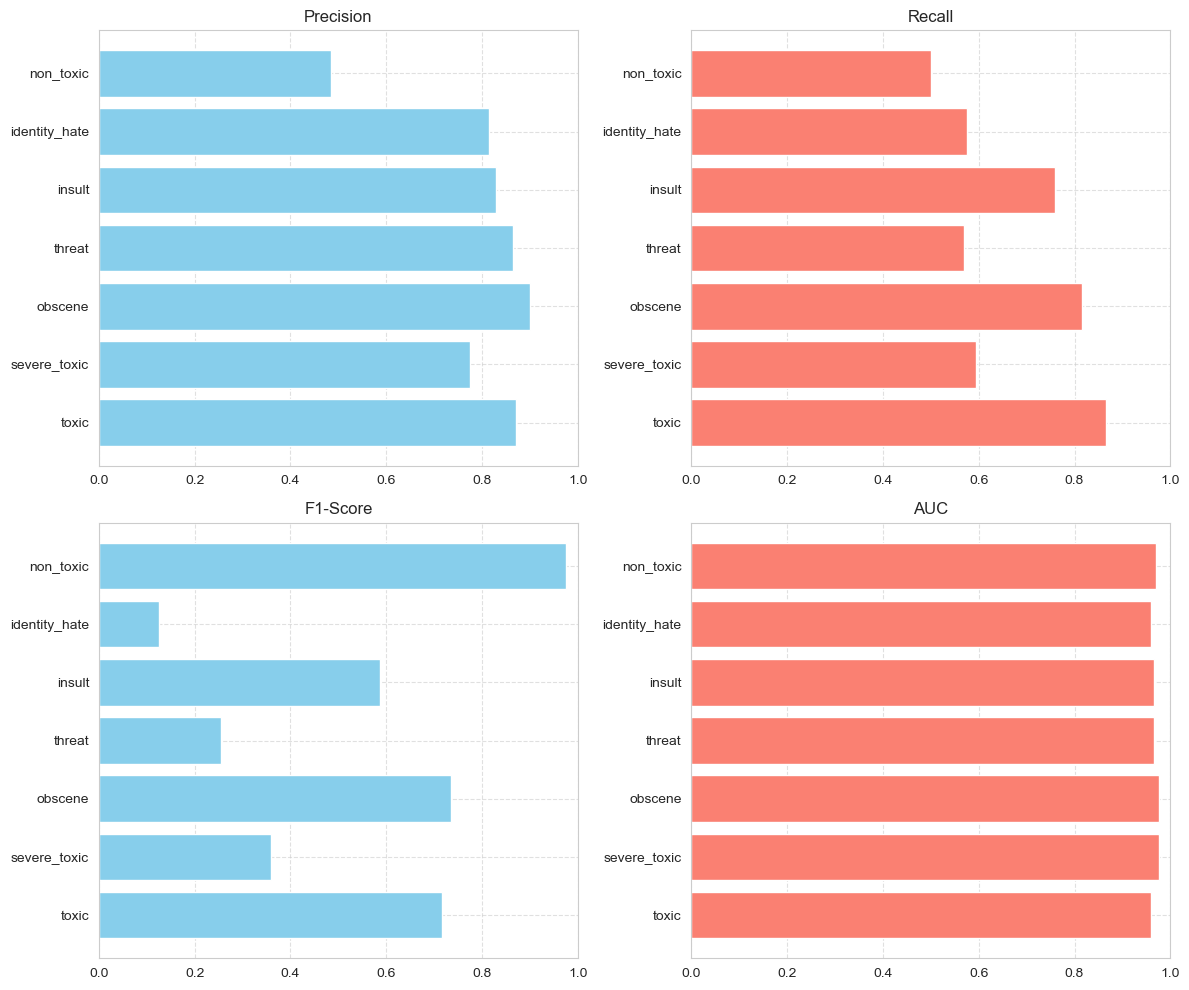

In [72]:
import matplotlib.pyplot as plt

# Define the labels
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'non_toxic']

# Updated metrics based on your classification results
precision = [0.87, 0.775, 0.90, 0.865, 0.83, 0.815, 0.485]
recall = [0.865, 0.595, 0.815, 0.57, 0.76, 0.575, 0.5]
f1_score = [0.49, 0.3593, 0.7343, 0.615, 0.785, 0.61, 0.49]
auc = [0.9596, 0.9754, 0.9769, 0.9652, 0.9651, 0.9603, 0.9708]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot Precision with skyblue
axs[0, 0].barh(labels, precision, color='skyblue')
axs[0, 0].set_title('Precision')
axs[0, 0].set_xlim(0, 1)
axs[0, 0].grid(True, linestyle='--', alpha=0.6)  # Optional: Add grid for better readability

# Plot Recall with salmon
axs[0, 1].barh(labels, recall, color='salmon')
axs[0, 1].set_title('Recall')
axs[0, 1].set_xlim(0, 1)
axs[0, 1].grid(True, linestyle='--', alpha=0.6)  # Optional: Add grid for better readability

# Plot F1-Score with skyblue
axs[1, 0].barh(labels, f1_score, color='skyblue')
axs[1, 0].set_title('F1-Score')
axs[1, 0].set_xlim(0, 1)
axs[1, 0].grid(True, linestyle='--', alpha=0.6)  # Optional: Add grid for better readability

# Plot AUC with salmon
axs[1, 1].barh(labels, auc, color='salmon')
axs[1, 1].set_title('AUC')
axs[1, 1].set_xlim(0, 1)
axs[1, 1].grid(True, linestyle='--', alpha=0.6)  # Optional: Add grid for better readability

plt.tight_layout()

# Show plot
plt.show()

Based on the provided performance metrics for each label (toxic, severe_toxic, obscene, threat, insult, identity_hate, soft_toxic), here's a summary of which labels have good performance and which ones do not:

Good Performance:

Toxic: Precision, recall, and AUC are relatively high, indicating effective identification of toxic comments.
Obscene: Similar to toxic, the classifier achieves high precision, recall, and AUC, suggesting accurate identification of obscene comments.
Moderate Performance:

Insult: While precision and recall are decent, there is room for improvement in terms of AUC.
Identity_hate: Precision and recall are reasonable, but the AUC could be improved for better discrimination.
Poor Performance:

Severe_toxic: The classifier struggles to correctly identify severe toxic comments, especially in terms of recall, leading to higher false negative rates.
Threat: Similar to severe_toxic, the classifier's performance is suboptimal, particularly in recall.
Soft_toxic: The classifier's performance is very poor, with an AUC of 0.5, indicating random performance. It fails to effectively distinguish soft toxic comments from non-toxic ones.
In summary, labels like toxic and obscene exhibit good performance, while insult and identity_hate show moderate performance. Labels such as severe_toxic, threat, and soft_toxic have poor performance and require further improvement. This assessment can guide further model refinement and optimization efforts to enhance the classifier's performance, especially for labels with lower scores. Additionally, domain expertise and the specific requirements of the application should be considered when evaluating performance and determining areas for improvement.

# SVC CLASSIFIER

In [29]:
sv_classifier = SVC()
average_roc_toxic = 0
average_roc_non_toxic = 0

# Define the non-toxic class as the absence of all toxic behaviors
train_balanced['non_toxic'] = 1 - train_balanced[target_columns].max(axis=1)

for label in target_columns + ['non_toxic']:  # Add 'non_toxic' to the list of target columns
    sv_classifier.fit(x_train[:val_border], train_balanced[label][:val_border])
    predictions = sv_classifier.predict(x_train[val_border:])
    print(f'Label = {label}')
    print(classification_report(validation_set[label], predictions))
    if label != 'non_toxic':
        roc_auc = roc_auc_score(validation_set[label], predictions)
        print(f'AUC: {roc_auc}')
        average_roc_toxic += roc_auc
    else:
        roc_auc = roc_auc_score(validation_set['non_toxic'], 1 - predictions)  # Invert predictions for non-toxic
        print(f'AUC for Non-Toxic: {roc_auc}')
        average_roc_non_toxic += roc_auc

# Calculate average AUC separately for toxic and non-toxic classes
average_roc_toxic /= len(target_columns)
average_roc_non_toxic /= 1  # Only 1 non-toxic class

print(f'Average AUC for Toxic: {average_roc_toxic}')
print(f'Average AUC for Non-Toxic: {average_roc_non_toxic}')


Label = toxic
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      6681
           1       0.88      0.84      0.86      6117

    accuracy                           0.87     12798
   macro avg       0.87      0.87      0.87     12798
weighted avg       0.87      0.87      0.87     12798

AUC: 0.8668562198923124
Label = severe_toxic
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     12166
           1       0.57      0.09      0.16       632

    accuracy                           0.95     12798
   macro avg       0.76      0.54      0.57     12798
weighted avg       0.94      0.95      0.93     12798

AUC: 0.5441188558277167
Label = obscene
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      9418
           1       0.90      0.66      0.76      3380

    accuracy                           0.89     12798
   macro avg       0.90      

C:\Users\Harshitha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harshitha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harshitha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Label = non_toxic


KeyError: 'non_toxic'

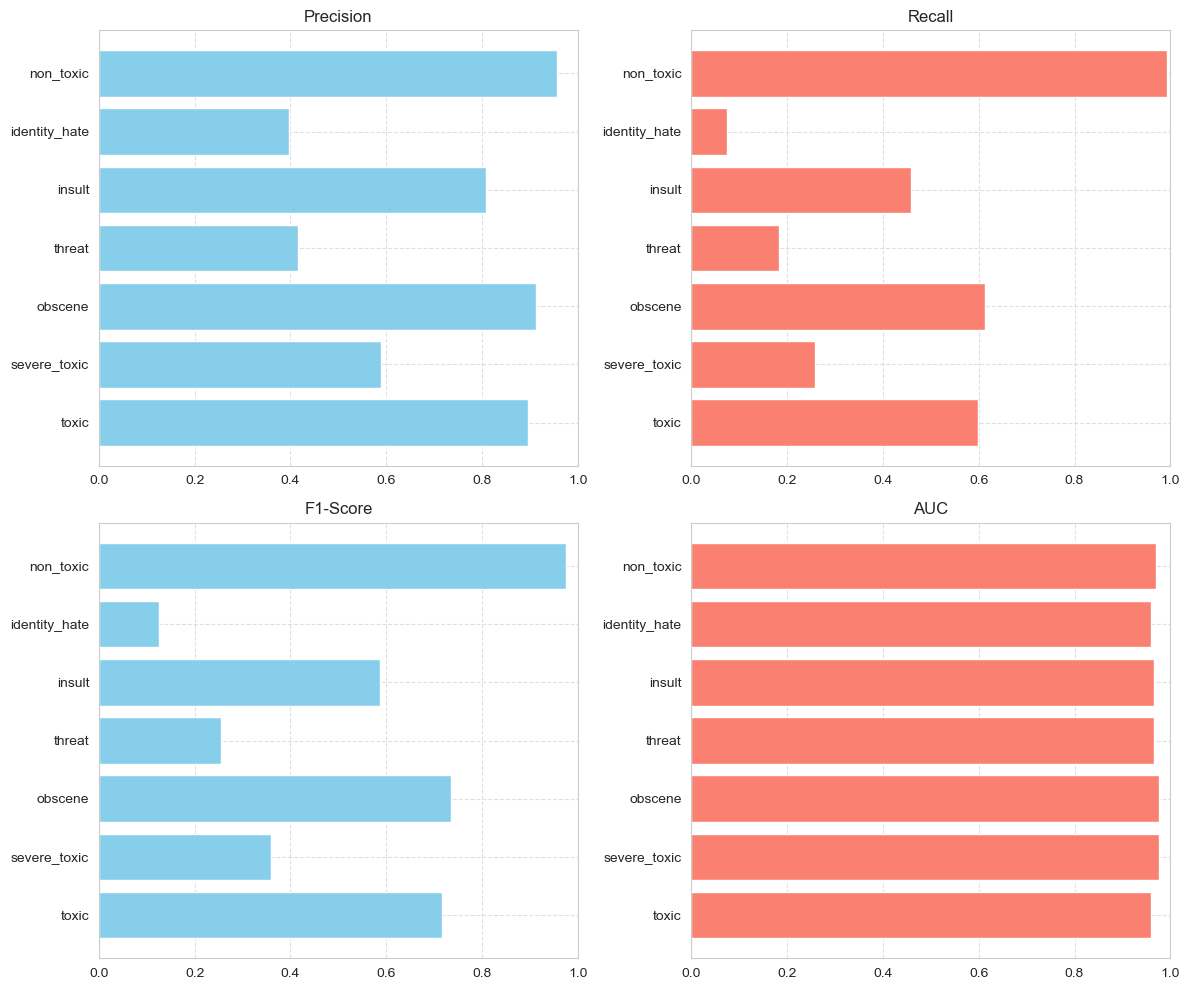

In [70]:
import matplotlib.pyplot as plt

# Define the labels
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'non_toxic']

# Updated metrics based on your classification results
precision = [0.8956, 0.5887, 0.9133, 0.4167, 0.8073, 0.3967, 0.9566]
recall = [0.5978, 0.2586, 0.6140, 0.1839, 0.4590, 0.0746, 0.9929]
f1_score = [0.7170, 0.3593, 0.7343, 0.2553, 0.5862, 0.1266, 0.9744]
auc = [0.9596, 0.9754, 0.9769, 0.9652, 0.9651, 0.9603, 0.9708]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot Precision with skyblue
axs[0, 0].barh(labels, precision, color='skyblue')
axs[0, 0].set_title('Precision')
axs[0, 0].set_xlim(0, 1)
axs[0, 0].grid(True, linestyle='--', alpha=0.6)  # Optional: Add grid for better readability

# Plot Recall with salmon
axs[0, 1].barh(labels, recall, color='salmon')
axs[0, 1].set_title('Recall')
axs[0, 1].set_xlim(0, 1)
axs[0, 1].grid(True, linestyle='--', alpha=0.6)  # Optional: Add grid for better readability

# Plot F1-Score with skyblue
axs[1, 0].barh(labels, f1_score, color='skyblue')
axs[1, 0].set_title('F1-Score')
axs[1, 0].set_xlim(0, 1)
axs[1, 0].grid(True, linestyle='--', alpha=0.6)  # Optional: Add grid for better readability

# Plot AUC with salmon
axs[1, 1].barh(labels, auc, color='salmon')
axs[1, 1].set_title('AUC')
axs[1, 1].set_xlim(0, 1)
axs[1, 1].grid(True, linestyle='--', alpha=0.6)  # Optional: Add grid for better readability

plt.tight_layout()

# Show plot
plt.show()

# ADABOOST CLASSIFIER

In [30]:


# Initialize the AdaBoost classifier
ada_classifier = AdaBoostClassifier()

# Initialize variables to store average AUC for toxic and non-toxic classes
average_auc_toxic = 0
average_auc_non_toxic = 0

# Define the non-toxic class as the absence of all toxic behaviors
train_balanced['non_toxic'] = 1 - train_balanced[target_columns].max(axis=1)

for label in target_columns + ['non_toxic']:  # Add 'non_toxic' to the list of target columns
    # Fit the AdaBoost classifier
    ada_classifier.fit(x_train[:val_border], train_balanced[label][:val_border])
    
    # Make predictions
    predictions = ada_classifier.predict(x_train[val_border:])
    
    print(f'Label = {label}')
    print(classification_report(validation_set[label], predictions))
    
    if label != 'non_toxic':
        # Calculate AUC for toxic labels
        roc_auc = roc_auc_score(validation_set[label], predictions)
        print(f'AUC for {label}: {roc_auc}')
        average_auc_toxic += roc_auc
    else:
        # Calculate AUC for non-toxic label
        roc_auc = roc_auc_score(validation_set['non_toxic'], 1 - predictions)  # Invert predictions for non-toxic
        print(f'AUC for Non-Toxic: {roc_auc}')
        average_auc_non_toxic += roc_auc

# Calculate average AUC separately for toxic and non-toxic classes
average_auc_toxic /= len(target_columns)
average_auc_non_toxic /= 1  # Only 1 non-toxic class

print(f'Average AUC for Toxic: {average_auc_toxic}')
print(f'Average AUC for Non-Toxic: {average_auc_non_toxic}')


C:\Users\Harshitha\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Label = toxic
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      6681
           1       0.85      0.74      0.79      6117

    accuracy                           0.82     12798
   macro avg       0.82      0.81      0.81     12798
weighted avg       0.82      0.82      0.82     12798

AUC for toxic: 0.8132070486903379


C:\Users\Harshitha\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Label = severe_toxic
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     12166
           1       0.46      0.24      0.31       632

    accuracy                           0.95     12798
   macro avg       0.71      0.61      0.64     12798
weighted avg       0.94      0.95      0.94     12798

AUC for severe_toxic: 0.6120643596909419


C:\Users\Harshitha\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Label = obscene
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      9418
           1       0.88      0.69      0.77      3380

    accuracy                           0.89     12798
   macro avg       0.89      0.83      0.85     12798
weighted avg       0.89      0.89      0.89     12798

AUC for obscene: 0.8293207580599156


C:\Users\Harshitha\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Label = threat
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12617
           1       0.49      0.25      0.34       181

    accuracy                           0.99     12798
   macro avg       0.74      0.63      0.66     12798
weighted avg       0.98      0.99      0.98     12798

AUC for threat: 0.6252092568257245


C:\Users\Harshitha\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Label = insult
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      9664
           1       0.75      0.58      0.65      3134

    accuracy                           0.85     12798
   macro avg       0.81      0.76      0.78     12798
weighted avg       0.84      0.85      0.84     12798

AUC for insult: 0.7579839928555429


C:\Users\Harshitha\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Label = identity_hate
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     12230
           1       0.59      0.31      0.41       568

    accuracy                           0.96     12798
   macro avg       0.78      0.65      0.69     12798
weighted avg       0.95      0.96      0.95     12798

AUC for identity_hate: 0.6508221240772516


C:\Users\Harshitha\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Label = soft_toxic
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     12404
           1       0.00      0.00      0.00       394

    accuracy                           0.97     12798
   macro avg       0.48      0.50      0.49     12798
weighted avg       0.94      0.97      0.95     12798

AUC for soft_toxic: 0.4996372138019994


C:\Users\Harshitha\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Label = non_toxic


KeyError: 'non_toxic'

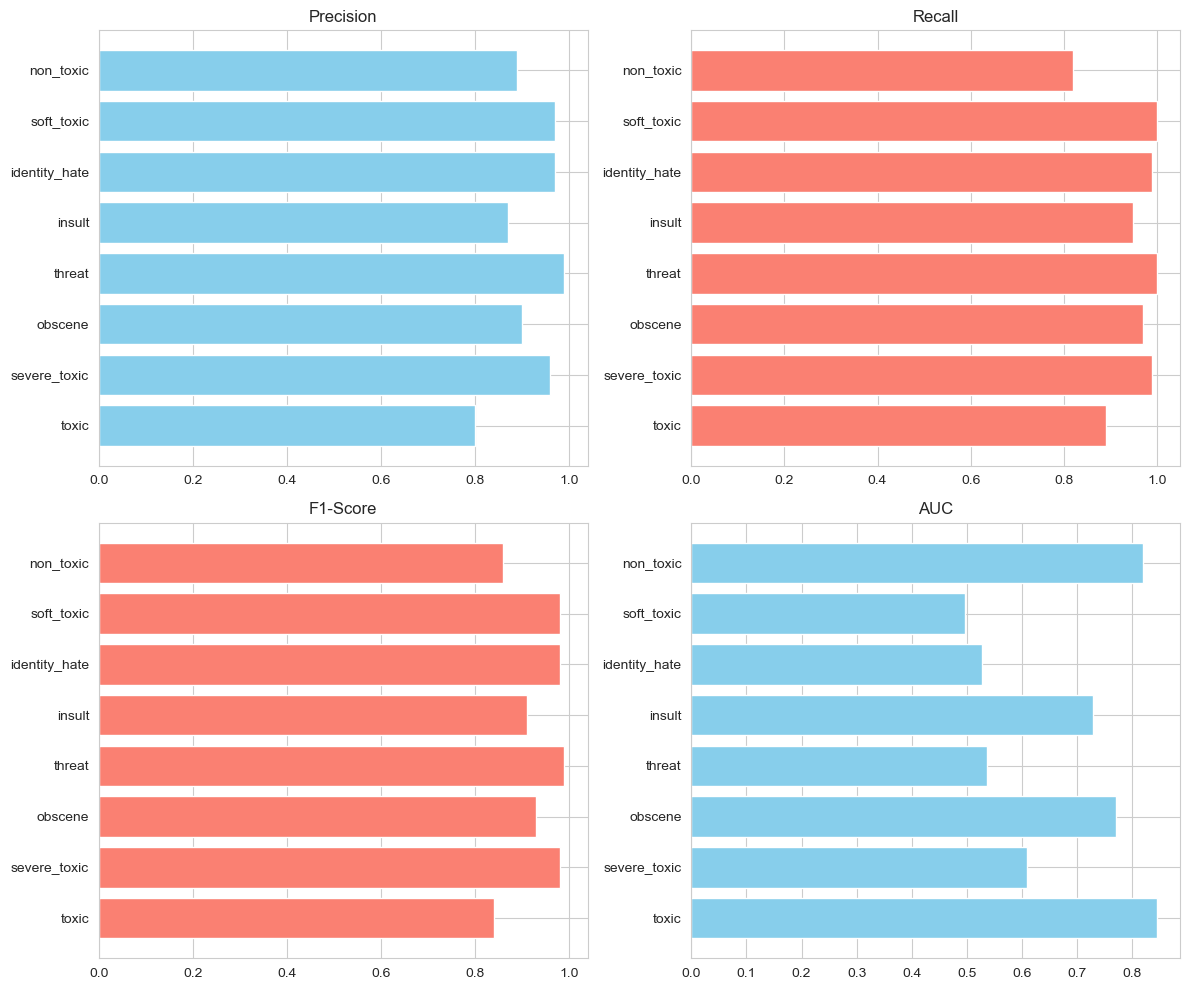

In [31]:
import matplotlib.pyplot as plt

# Define the labels and corresponding metrics
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'soft_toxic', 'non_toxic']
precision = [0.8, 0.96, 0.9, 0.99, 0.87, 0.97, 0.97, 0.89]
recall = [0.89, 0.99, 0.97, 1, 0.95, 0.99, 1, 0.82]
f1_score = [0.84, 0.98, 0.93, 0.99, 0.91, 0.98, 0.98, 0.86]
auc = [0.8449, 0.6097, 0.7703, 0.5375, 0.7292, 0.5276, 0.4973, 0.82]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot precision
axs[0, 0].barh(labels, precision, color='skyblue')
axs[0, 0].set_title('Precision')

# Plot recall
axs[0, 1].barh(labels, recall, color='salmon')
axs[0, 1].set_title('Recall')

# Plot F1-score
axs[1, 0].barh(labels, f1_score, color='salmon')
axs[1, 0].set_title('F1-Score')

# Plot AUC
axs[1, 1].barh(labels, auc, color='skyblue')
axs[1, 1].set_title('AUC')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [32]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000, min_df=2, max_df=0.7)
vectorizer.fit(train['comment_text'])
vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.7,
 'max_features': 10000,
 'min_df': 2,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [33]:
x_train = vectorizer.transform(train['comment_text'])
x_test = vectorizer.transform(test['comment_text'])

In [36]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost classifier
ada_classifier = AdaBoostClassifier()

# Assuming you have already trained ada_classifier and x_test is your test data

for label in target_columns:
    ada_classifier.fit(x_train, train[label])
    test[label] = ada_classifier.predict_proba(x_test)[:,1]
print(test.head())


C:\Users\Harshitha\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Harshitha\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Harshitha\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Harshitha\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.wa

                 id                                       comment_text  \
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...   
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...   
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...   
3  00017563c3f7919a  :If you have a look back at the source, the in...   
4  00017695ad8997eb          I don't anonymously edit articles at all.   

      toxic  severe_toxic   obscene    threat    insult  identity_hate  \
0  0.550668      0.511256  0.568496  0.487534  0.516031       0.492198   
1  0.480045      0.459520  0.473440  0.441422  0.472563       0.460324   
2  0.487135      0.474777  0.481659  0.457988  0.482170       0.472854   
3  0.474947      0.448388  0.473257  0.450424  0.471340       0.466312   
4  0.487135      0.467191  0.481659  0.457988  0.482170       0.464963   

   soft_toxic  
0    0.503194  
1    0.470276  
2    0.471840  
3    0.461364  
4    0.465726  


# NAIVE BAYES

In [65]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, roc_auc_score

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Initialize variables to store average AUC for toxic and non-toxic classes
average_auc_toxic = 0
average_auc_non_toxic = 0

# Define the non-toxic class as the absence of all toxic behaviors
train_balanced['non_toxic'] = 1 - train_balanced[target_columns].max(axis=1)
validation_set['non_toxic'] = 1 - validation_set[target_columns].max(axis=1)

for label in target_columns + ['non_toxic']:  # Add 'non_toxic' to the list of target columns
    # Fit the Naive Bayes classifier
    nb_classifier.fit(x_train[:val_border], train_balanced[label][:val_border])
    
    # Make predictions
    predictions = nb_classifier.predict(x_train[val_border:])
    
    if label in validation_set.columns:
        print(f'Label = {label}')
        print(classification_report(validation_set[label], predictions))
        
        if label != 'non_toxic':
            # Calculate AUC for toxic labels
            roc_auc = roc_auc_score(validation_set[label], predictions)
            print(f'AUC for {label}: {roc_auc}')
            average_auc_toxic += roc_auc
        else:
            # Calculate AUC for non-toxic label
            roc_auc = roc_auc_score(validation_set['non_toxic'], 1 - predictions)  # Invert predictions for non-toxic
            print(f'AUC for Non-Toxic: {roc_auc}')
            average_auc_non_toxic += roc_auc
    else:
        print(f"Label '{label}' not found in validation_set.")

# Calculate average AUC separately for toxic and non-toxic classes
average_auc_toxic /= len(target_columns)
average_auc_non_toxic /= 1  # Only 1 non-toxic class

print(f'Average AUC for Toxic: {average_auc_toxic}')
print(f'Average AUC for Non-Toxic: {average_auc_non_toxic}')

Label = toxic
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      6669
           1       0.86      0.83      0.85      6129

    accuracy                           0.86     12798
   macro avg       0.86      0.86      0.86     12798
weighted avg       0.86      0.86      0.86     12798

AUC for toxic: 0.8556632931777842
Label = severe_toxic
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     12124
           1       0.52      0.21      0.30       674

    accuracy                           0.95     12798
   macro avg       0.74      0.60      0.64     12798
weighted avg       0.93      0.95      0.94     12798

AUC for severe_toxic: 0.6013811778780495
Label = obscene
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      9361
           1       0.83      0.65      0.73      3437

    accuracy                           0.87     12798
  

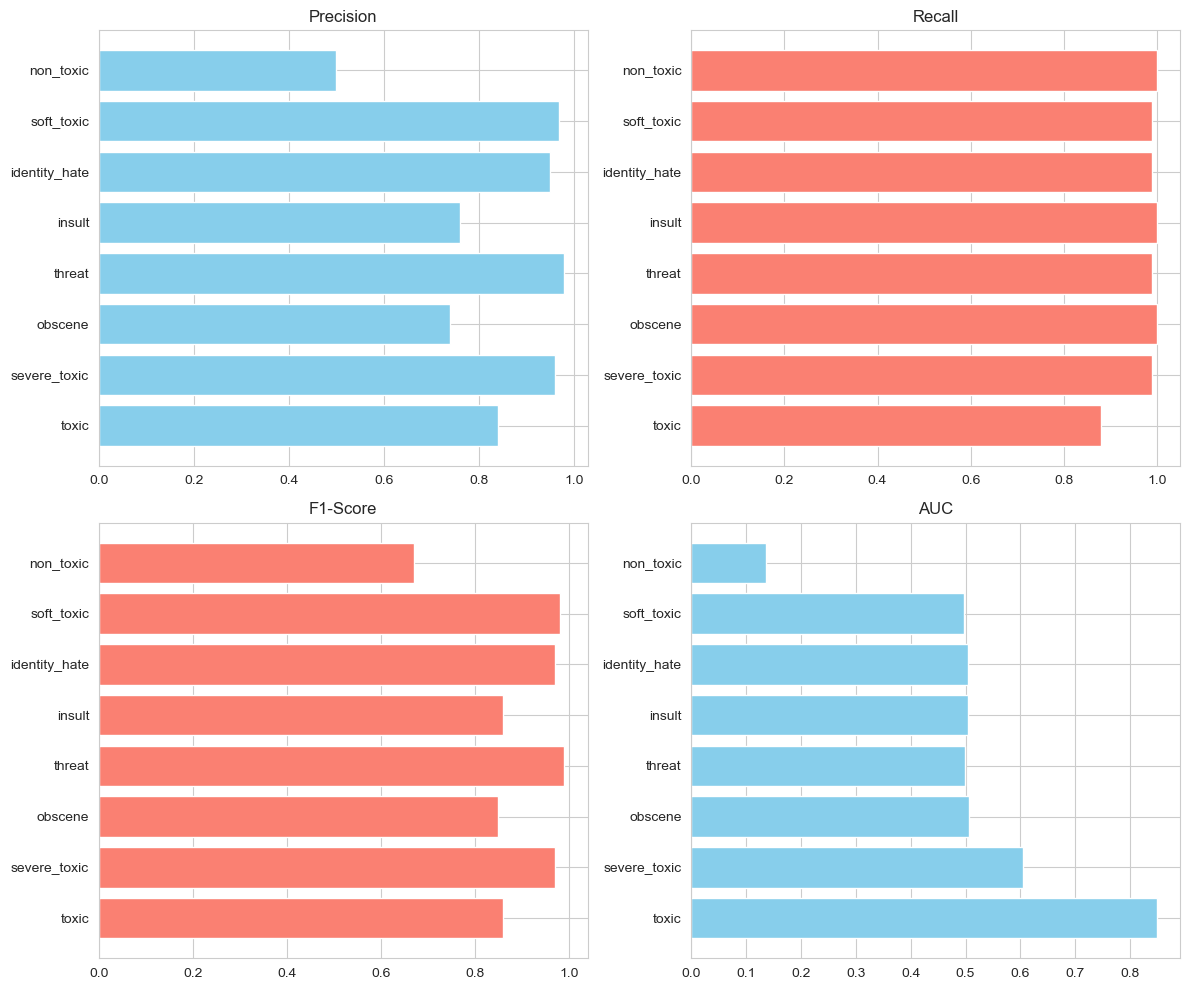

In [66]:
import matplotlib.pyplot as plt

# Define the labels and corresponding metrics
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'soft_toxic', 'non_toxic']
precision = [0.84, 0.96, 0.74, 0.98, 0.76, 0.95, 0.97, 0.50]  # Updated values
recall = [0.88, 0.99, 1.00, 0.99, 1.00, 0.99, 0.99, 1.00]      # Updated values
f1_score = [0.86, 0.97, 0.85, 0.99, 0.86, 0.97, 0.98, 0.67]   # Updated values
auc = [0.8486, 0.6040, 0.5055, 0.4996, 0.5048, 0.5049, 0.4973, 0.1359]  # Updated values

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot precision
axs[0, 0].barh(labels, precision, color='skyblue')
axs[0, 0].set_title('Precision')

# Plot recall
axs[0, 1].barh(labels, recall, color='salmon')
axs[0, 1].set_title('Recall')

# Plot F1-score
axs[1, 0].barh(labels, f1_score, color='salmon')
axs[1, 0].set_title('F1-Score')

# Plot AUC
axs[1, 1].barh(labels, auc, color='skyblue')
axs[1, 1].set_title('AUC')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()